## ARIMA Future Forecast

c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2607
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -5343.184
Date:                Mon, 29 Sep 2025   AIC                          10702.367
Time:                        10:29:41   BIC                          10749.292
Sample:                    01-02-2015   HQIC                         10719.367
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4849      0.013     38.064      0.000       0.460       0.510
ar.L2         -0.9922      0.015    -64.538      0.000      -1.022      -0.962
ar.L3         -0.0592      0.020     -2.915      0.0

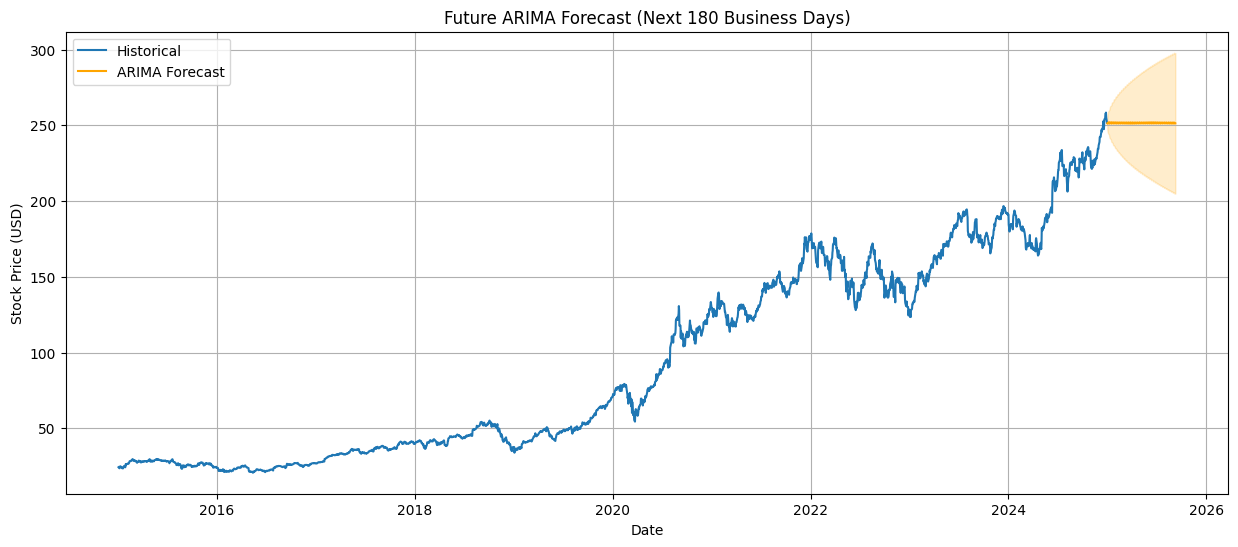

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import os

df = pd.read_csv("AAPL_clean.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('B')  
df['Close'] = pd.to_numeric(df['Close'], errors='coerce').ffill()

model = ARIMA(df['Close'], order=(5, 1, 2))  
arima_result = model.fit()
print(arima_result.summary())

forecast_steps = 180
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='B')

os.makedirs("Models", exist_ok=True)

future_arima_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast_values
})
future_arima_df.to_csv("Models/future_arima.csv", index=False)
print("Future ARIMA predictions saved to 'Models/future_arima.csv'")

plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='orange', alpha=0.2)
plt.title("Future ARIMA Forecast (Next 180 Business Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()